In [1]:
import pandas as pd
import numpy as np
from sargas import *
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
rc = 3.0
n = 500
rho = 0.9
dt = 0.005
f = 20
t_init = 0.851

potential = Potential.lennard_jones(1.0, 1.0, rc, True)
system = System(Configuration.lattice(n, rho, initial_temperature=t_init), potential)
velocity_verlet = Integrator.velocity_verlet(dt)
#md = MolecularDynamics(velocity_verlet, Thermostat.velocity_rescaling(t_init))
md = MolecularDynamics(velocity_verlet, Thermostat.andersen(t_init, dt, 100))
simulation = Simulation.molecular_dynamics(system, md, 1)
simulation.run(10_000)

In [16]:
props = Observer.properties(f)
simulation.add_observer(props)
simulation.run(20_000)

In [17]:
%%time
simulation.run(5_000)

CPU times: user 4.36 s, sys: 122 µs, total: 4.36 s
Wall time: 4.35 s


In [18]:
results = pd.DataFrame(props.data)
results['time'] = results.index * dt * f
results['temperature'] = 2 / 3 * results.kinetic_energy / 500
results.head()

,virial,kinetic_energy,pressure,total_energy,potential_energy,time,temperature
0,2809.396018,662.496364,1.183442,-2481.223256,-3143.719620,0.0,0.883328
1,3431.626177,629.446342,1.556781,-2475.679420,-3105.125762,0.1,0.839262
2,3465.941062,659.425358,1.577369,-2443.956882,-3103.382240,0.2,0.879234
3,3608.389841,641.913189,1.662839,-2453.307726,-3095.220915,0.3,0.855884
4,3835.404963,624.347554,1.799048,-2458.491533,-3082.839088,0.4,0.832463


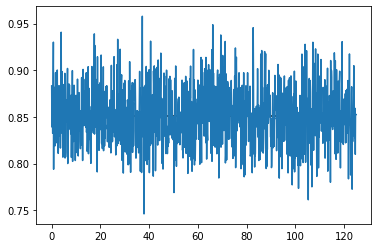

In [19]:
plt.plot(results.time, results.temperature)
plt.hlines(t_init, 0, 120, "k")

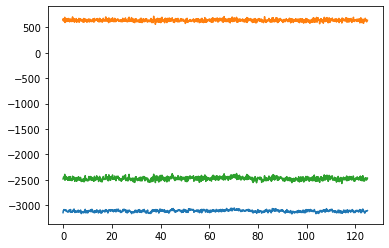

In [20]:
plt.plot(results.time, results.potential_energy)
plt.plot(results.time, results.kinetic_energy)
plt.plot(results.time, results.total_energy)
#plt.xlim(100, 200)

In [29]:
results.total_energy.values[::10].mean() / 500

-4.951158568621746

In [30]:
results.kinetic_energy.values[::10].mean() / 500

1.2789860120553984

In [31]:
results.potential_energy.values[::10].mean() / 500

-6.230144580677145

In [13]:
results.pressure.values[::10].mean() + rho * t_init

3.23294118790949